<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/PR1B_Block_world_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial State:


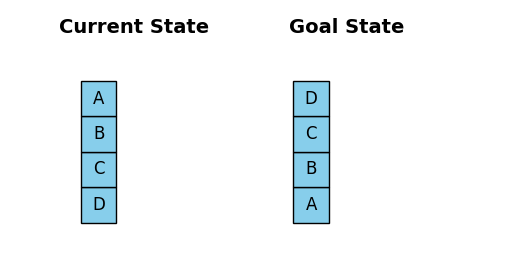


Intermediate (Unstacked) State:

Goal State:

Action Sequence:
1. UNSTACK(A, B)
2. PUTDOWN(A)
3. UNSTACK(B, C)
4. PUTDOWN(B)
5. UNSTACK(C, D)
6. PUTDOWN(C)
7. PICKUP(D)
8. STACK(D, C)
9. PICKUP(C)
10. STACK(C, B)
11. PICKUP(B)
12. STACK(B, A)


In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# === Predicate Classes ===
class ON:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __eq__(self, other):
        return isinstance(other, ON) and self.x == other.x and self.y == other.y
    def __hash__(self):
        return hash(('on', self.x, self.y))
    def __repr__(self):
        return f"ON({self.x}, {self.y})"

class ONTABLE:
    def __init__(self, x):
        self.x = x
    def __eq__(self, other):
        return isinstance(other, ONTABLE) and self.x == other.x
    def __hash__(self):
        return hash(('ontable', self.x))
    def __repr__(self):
        return f"ONTABLE({self.x})"

class CLEAR:
    def __init__(self, x):
        self.x = x
    def __eq__(self, other):
        return isinstance(other, CLEAR) and self.x == other.x
    def __hash__(self):
        return hash(('clear', self.x))
    def __repr__(self):
        return f"CLEAR({self.x})"

class ARMEMPTY:
    def __eq__(self, other):
        return isinstance(other, ARMEMPTY)
    def __hash__(self):
        return hash('armempty')
    def __repr__(self):
        return "ARMEMPTY()"

class HOLDING:
    def __init__(self, x):
        self.x = x
    def __eq__(self, other):
        return isinstance(other, HOLDING) and self.x == other.x
    def __hash__(self):
        return hash(('holding', self.x))
    def __repr__(self):
        return f"HOLDING({self.x})"

# === Action Class ===
class Action:
    def __init__(self, name, *args):
        self.name = name
        self.args = args
    def __repr__(self):
        return f"{self.name.upper()}({', '.join(self.args)})"

# === Visualization ===
class BlocksWorldVisualizer:
    def __init__(self, world_state, goal_state=None):
        self.world_state = world_state
        self.goal_state = goal_state
        self.fig, self.ax = plt.subplots()

    def draw(self):
        self.ax.clear()
        self.ax.set_xlim(-2, 12)
        self.ax.set_ylim(-1, 6)
        self.ax.set_aspect('equal', 'box')
        self.draw_state(self.world_state, offset=0, label="Current State")
        if self.goal_state:
            self.draw_state(self.goal_state, offset=6, label="Goal State")
        self.ax.axis('off')
        plt.show()

    def draw_state(self, world_state, offset, label):
        self.ax.text(offset + 1.5, 5.5, label, ha='center', va='center', fontsize=14, fontweight='bold')
        ontable = [pred for pred in world_state if isinstance(pred, ONTABLE)]
        stack_positions = {}
        for i, pred in enumerate(ontable):
            stack_positions[pred.x] = (i, 0)
            self.draw_block(pred.x, i * 2 + offset, 0)

        remaining = [pred for pred in world_state if isinstance(pred, ON)]
        while remaining:
            for pred in remaining[:]:
                if pred.y in stack_positions:
                    x_base, y_base = stack_positions[pred.y]
                    stack_positions[pred.x] = (x_base, y_base + 1)
                    self.draw_block(pred.x, x_base * 2 + offset, y_base + 1)
                    remaining.remove(pred)

        holding = [pred.x for pred in world_state if isinstance(pred, HOLDING)]
        for block in holding:
            self.ax.add_patch(patches.Circle((offset + 3, 4), 0.5, edgecolor='black', facecolor='orange'))
            self.ax.text(offset + 3, 4, block, color='black', ha='center', va='center', fontsize=12)

    def draw_block(self, block, x, y):
        self.ax.add_patch(patches.Rectangle((x, y), 1, 1, edgecolor='black', facecolor='skyblue'))
        self.ax.text(x + 0.5, y + 0.5, block, color='black', ha='center', va='center', fontsize=12)

# === Planner ===
class SimplePlannerWithVisualization:
    def __init__(self, initial_state, goal_state):
        self.visualizer = BlocksWorldVisualizer(initial_state, goal_state)
        self.initial_state = initial_state
        self.goal_state = goal_state

    def run(self):
        print("Initial State:")
        self.visualizer.world_state = self.initial_state
        self.visualizer.draw()

        print("\nIntermediate (Unstacked) State:")
        intermediate_state = [
            ONTABLE('A'), ONTABLE('B'), ONTABLE('C'), ONTABLE('D'),
            CLEAR('A'), CLEAR('B'), CLEAR('C'), CLEAR('D'),
            ARMEMPTY()
        ]
        self.visualizer.world_state = intermediate_state
        self.visualizer.draw()

        print("\nGoal State:")
        self.visualizer.world_state = self.goal_state
        self.visualizer.draw()

        print("\nAction Sequence:")
        actions = self.generate_action_sequence()
        self.print_action_sequence(actions)

    def generate_action_sequence(self):
        actions = []
        actions.append(Action('UNSTACK', 'A', 'B'))
        actions.append(Action('PUTDOWN', 'A'))
        actions.append(Action('UNSTACK', 'B', 'C'))
        actions.append(Action('PUTDOWN', 'B'))
        actions.append(Action('UNSTACK', 'C', 'D'))
        actions.append(Action('PUTDOWN', 'C'))

        actions.append(Action('PICKUP', 'D'))
        actions.append(Action('STACK', 'D', 'C'))
        actions.append(Action('PICKUP', 'C'))
        actions.append(Action('STACK', 'C', 'B'))
        actions.append(Action('PICKUP', 'B'))
        actions.append(Action('STACK', 'B', 'A'))
        return actions

    def print_action_sequence(self, actions):
        for i, action in enumerate(actions, 1):
            print(f"{i}. {action}")

# === Main Execution ===
initial_state = [
    ON('A', 'B'),
    ON('B', 'C'),
    ON('C', 'D'),
    ONTABLE('D'),
    CLEAR('A'),
    ARMEMPTY()
]

goal_state = [
    ON('D', 'C'),
    ON('C', 'B'),
    ON('B', 'A'),
    ONTABLE('A'),
    CLEAR('D'),
    ARMEMPTY()
]

planner = SimplePlannerWithVisualization(initial_state, goal_state)
planner.run()
